# 02. MACHINE LEARNING

1. Introduction
2. Gradient descent
3. Neural networks
4. Backpropagation
5. Exercise
6. References

# 1. Introduction to machine learning

- $X$ is a set of objects
- $Y$ is a set of answers
- $y^∗: X \rightarrow Y$ is an objective function, the values of which $y_i = y^∗(x_i)$ are known only on a finite subset of objects $\{ x_1, ..., x_l\} \subseteq X$
 
Set of pairs $X_l = \{(x_i, y_i) | i \in \{1, ..., l\} \}$ is called *the training set*.

#### Problem

It is necessary to restore the function $y^∗$ from the set $X_l$.

That is, it is necessary to construct a function $y: X \rightarrow Y$ that would approximate the objective function $y^∗(x)$, not only on the objects of the training set, but also on the entire set $X$.

![](./res/02_learning_scheme.jpg)

#### Optimization

How to construct a function $y: X \rightarrow Y$?

1. Let's define an auxiliary loss function --- this is a non-negative function $L(y, x)$, characterizing the error value of the function $y$ on the object $x$. If $L(y, x) = 0$, then the answer $y$ is called *correct*.
2. Depending on the value of the loss function, we will correct the function $y$.

The correction assumes:
1. there is some set $A$ of functions
2. the functions from $A$ are parameterized: $A = \{f_a | a \in D\}$, $D$ is a set of admissible parameters
3. there is some rule that selects $f_a$ depending on the value of the loss function. Ideally, we want to select such $f_a \in A$ that $L(f_a, x)$ takes minimal values for all $a \in D.$

Example: Linear regression, two-parameter family of functions (lines $y = kx + b$).

![](./res/02_linear_regression.jpg)

The search for the function $y$ can be represented as a descent along the relief of the loss function:

![https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png](https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png)

Thus, we have an *optimization problem*.

#### How will we know that the training was successful?

1. Value of the loss function.
2. Testing on hold-out dataset

![](./res/02_learning.jpg)

#### Optimization methods

What optimization methods do you know?

- differentiable functions
- continuous functions
- discontinuous functions

If we compare optimization of differentiable and discontinuous functions, which is easier and why?

# 2. Gradient descent

It is usually assumed that functions are differentiable. Then *gradient descent* can be used.

$$\frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x+h) -f (x)}{h}$$

![](./res/02_gradient_descent_1.jpeg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

#### Are there any disadvantages to gradient descent?

![](./res/02_gradient_descent_2.jpeg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

# 3. Neural networks

![](./res/02_neural_network_human_cortex.png)

[Cortex neurons (Ramón y Cajal)]

#### Single neuron model

![](https://www.researchgate.net/publication/374679637/figure/fig2/AS:11431281206265945@1700629912758/Neural-network-architecture.png)

or

![](./res/02_neuron_math.jpg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

#### Neural network

![](./res/02_neural_network_math.jpg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

#### The universality of neural networks

Nonlinearity

![](./res/02_nonlinearity.jpg)

Cybenko's theorem

![](./res/02_cybenko_1.png)
![](./res/02_cybenko_2.png)

#### PyTorch

[AlexNet](https://proceedings.neurips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), scheme:

![](./res/02_alexnet.png)

AlexNet, code in PyTorch:

![](./res/02_alexnet_code.png)

# 4. Backpropagation

#### How to optimize

Suppose we want to optimize a loss function using gradient descent.

1. we have a loss function $L$ that we want to minimize
2. we have model parameters that we can change
3. if we take the parameter $w$, then $\frac{dL}{dw}$ contains information about what change in the value of the loss function $L$ will result from a small change in the parameter $w$

Suppose $y = g(x)$ and $z = f (g(x)) = f (y)$.
Then $$\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}.$$

#### Problem

Let's take a slightly more complex situation: $x = f(w)$, $y = f(x)$, $z = f(y)$.
Then
$$\frac{dz}{dw} = \frac{dz}{dy} \frac{dy}{dx} \frac{dx}{dw} =$$
$$= f'(y) f'(x) f'(w) =$$
$$= f'(f(f(w))) f'(f(w)) f'(w).$$

The expression $f(w)$ occurs more than once. We can:
1. calculate, save and use
2. calculate each time

#### Solution

How can this problem be solved? --- Backpropagation algorithm.

The method was first described in 1974 by A. I. Galushkin, and also independently and simultaneously by Paul J. Werbos

![](./res/02_learning_process.jpg)

#### [karpathy/micrograd](https://github.com/karpathy/micrograd)

In [2]:
from micrograd.engine import Value
from graphviz import Digraph

In [3]:
# utilities

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{data %.2f | grad %.2f}" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

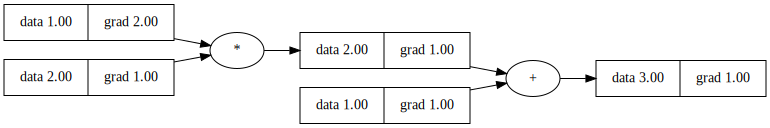

In [4]:
x = Value(1.0); x.label = 'x'
#y = (x * 2 + 1).relu()
y = x * 2 + 1
y.backward()
draw_dot(y)

https://github.com/karpathy/micrograd/blob/master/micrograd/engine.py

![](./res/02_micrograd_value.png)

### PyTorch

![](./res/02_computation_graph_pytorch_1.jpg)

`loss.backward()`

![](./res/02_computation_graph_pytorch_2.jpg)

[Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools]

# 5. Exercise

Implement the operation:

$\tanh(x)$ --- hyperbolic tangent

as a method of the [Value](https://github.com/karpathy/micrograd/blob/c911406e5ace8742e5841a7e0df113ecb5d54685/micrograd/engine.py#L2) class. For testing, you need to build a computational graph, run backpropagation and draw it ([example](https://github.com/karpathy/micrograd/blob/master/trace_graph.ipynb)).

Example for the addition operation: https://github.com/karpathy/micrograd/blob/c911406e5ace8742e5841a7e0df113ecb5d54685/micrograd/engine.py#L13.
Additional [explanations](https://www.youtube.com/watch?v=VMj-3S1tku0).

# 6. References

1. [Goodfellow et al - Deep learning](https://www.deeplearningbook.org/)
2. [Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools](https://www.manning.com/books/deep-learning-with-pytorch)
3. [Karpathy - Neural Networks: Zero to Hero](https://github.com/karpathy/nn-zero-to-hero/tree/master)
4. [Zhang et al - Dive into Deep Learning](https://d2l.ai/)
5. [Karpathy - The spelled-out intro to neural networks and backpropagation: building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0)
6. [Clarkson - LLM from scratch: Automatic Differentiation](https://bclarkson-code.com/posts/llm-from-scratch-scalar-autograd/post.html)
7. [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
8. [Ramón y Cajal and the Case for Drawing in Science](https://www.scientificamerican.com/blog/sa-visual/ramon-y-cajal-and-the-case-for-drawing-in-science2/) 